######AdiPokharna
# Chit 1 or 12

*Problem Statement*:

    Implementing Feedforward neural networks with Keras and TensorFlow for classification of  hand-written MNIST dataset using below steps:
    a. Import the necessary packages
    b. Load the training and testing data
    c. Define the network architecture using Keras
    d. Train the model using SGD with 11 epochs
    e. Evaluate the network  
    f. Plot the training loss and accuracy


New Code according to datasets

## a. Import the necessary packages


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical

## b. Load the training and testing data


In [20]:
train = pd.read_csv("/content/mnist_train.csv")
train

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0          0      0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
59995      0      0      0      0      0      0      0      0  
59996      0      0      0      0      0      0      0      0  
59997      0      0      0      0      0      0      0      0  
59998      0      0      0      0      0      0      0      0  
59999      0      0      0      0      0      0      0      0  

[60000 rows x 785 columns]

In [21]:
test = pd.read_csv("/content/mnist_test.csv")
test

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0         0      0      0      0      0      0      0      0  
1         0      0      0      0      0      0      0      0  
2         0      0      0      0      0      0      0      0  
3         0      0      0      0      0      0      0      0  
4         0      0      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
9995      0      0      0      0      0      0      0      0  
9996      0      0      0      0      0      0      0      0  
9997      0      0      0      0      0      0      0      0  
9998      0      0      0      0      0      0      0      0  
9999      0      0      0      0      0      0      0      0  

[10000 rows x 785 columns]

In [22]:
train.isnull().sum().sum()

0

In [23]:
x_train = train.drop(['label'], axis=1).values
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
x_train = x_train.astype('float32')/255

In [25]:
y_train = train['label'].values

## c. Define the network architecture using Keras


In [26]:
# c. Define the network architecture using Keras
model = Sequential()
model.add(Dense(128, input_shape = (784, ) ,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## d. Train the model using SGD with 11 epochs


In [27]:
history = model.fit(x_train, y_train, epochs=11, batch_size=32, validation_split=0.2)

r = model.fit(x_train, y_train, validation_split= 0.2, batch_size = 128, epochs = 11)

Epoch 1/11
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3165 - accuracy: 0.9062 - val_loss: 0.1408 - val_accuracy: 0.9569
Epoch 2/11
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1379 - accuracy: 0.9591 - val_loss: 0.1104 - val_accuracy: 0.9671
Epoch 3/11
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0993 - accuracy: 0.9701 - val_loss: 0.0952 - val_accuracy: 0.9717
Epoch 4/11
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 5/11
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0616 - accuracy: 0.9807 - val_loss: 0.1098 - val_accuracy: 0.9682
Epoch 6/11
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.0929 - val_accuracy: 0.9716
Epoch 7/11
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0442 - accuracy: 0.9855 - val_loss: 0.0933 - val_accuracy:

In [28]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [29]:
x_test = x_test.astype('float32') / 255

## e. Evaluate the network  

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1124 - accuracy: 0.9797


## f. Plot the training loss and accuracy

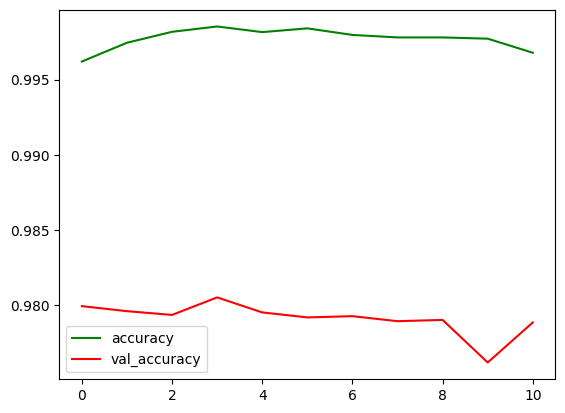

In [33]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

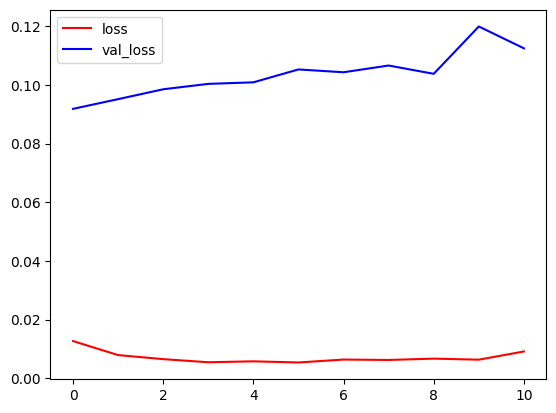

In [34]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()